# Working with Census Data

Using the tidycensus R package to query and download Census data and the corresponding geographies.

See more about tidycensus here: https://walker-data.com/tidycensus/

# Install R on your computer

See: https://cran.r-project.org/bin/macosx/

## Enable RPy2

In [33]:
!pip install rpy2

In [34]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Install Necessary R Libraries

In [35]:
from rpy2.robjects.packages import importr
utils = importr('utils')

In [36]:
#utils.install_packages('tidycensus', repos="https://cran.rstudio.com")
#utils.install_packages('tidyverse', repos="https://cran.rstudio.com")
#utils.install_packages('sf', repos="https://cran.rstudio.com")

## Load the necessary R Libraries

In [37]:
%%R
library(tidycensus)
library(tidyverse)
library(sf)
library(tigris)

## Get Median HHI in NYC by Census Tract

In [38]:
%%R

median_hhi_tract <- get_acs(
  geography = "tract",
  variables = "B19013_001E",
  state = "NY",
  county = c("New York", "Bronx","Kings", "Queens", "Kings", "Richmond"),
  year = 2020,
  geometry = TRUE
)

R[write to console]: Getting data from the 2016-2020 5-year ACS

R[write to console]: Downloading feature geometry from the Census website.  To cache shapefiles for use in future sessions, set `options(tigris_use_cache = TRUE)`.

R[write to console]: Using FIPS code '36' for state 'NY'

R[write to console]: Using FIPS code '061' for 'New York County'

R[write to console]: Using FIPS code '005' for 'Bronx County'

R[write to console]: Using FIPS code '047' for 'Kings County'

R[write to console]: Using FIPS code '081' for 'Queens County'

R[write to console]: Using FIPS code '047' for 'Kings County'

R[write to console]: Using FIPS code '085' for 'Richmond County'



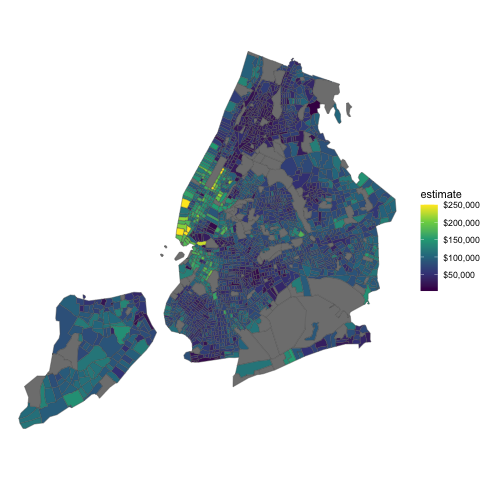

In [39]:
%%R
ggplot(median_hhi_tract, aes(fill = estimate)) + 
  geom_sf() + 
  theme_void() + 
  scale_fill_viridis_c(labels = scales::dollar)

## Get Median HHI in NYC by Census Tract Clipped to Shoreline

In [40]:
%%R

median_hhi_tract_clipped <- get_acs(
  geography = "tract",
  variables = "B19013_001E",
  state = "NY",
  county = c("New York", "Bronx","Kings", "Queens", "Kings", "Richmond"),
  year = 2020,
  geometry = TRUE
) %>%
  st_transform(6933) %>%
  erase_water(area_threshold = 0.75) %>%
    st_transform(4326)

R[write to console]: Getting data from the 2016-2020 5-year ACS

R[write to console]: Downloading feature geometry from the Census website.  To cache shapefiles for use in future sessions, set `options(tigris_use_cache = TRUE)`.

R[write to console]: Using FIPS code '36' for state 'NY'

R[write to console]: Using FIPS code '061' for 'New York County'

R[write to console]: Using FIPS code '005' for 'Bronx County'

R[write to console]: Using FIPS code '047' for 'Kings County'

R[write to console]: Using FIPS code '081' for 'Queens County'

R[write to console]: Using FIPS code '047' for 'Kings County'

R[write to console]: Using FIPS code '085' for 'Richmond County'

R[write to console]: Fetching area water data for your dataset's location...

R[write to console]: Erasing water area...
If this is slow, try a larger area threshold value.



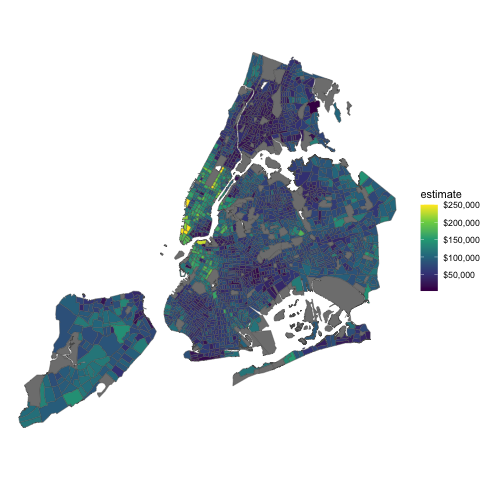

In [41]:
%%R
ggplot(median_hhi_tract_clipped, aes(fill = estimate)) + 
  geom_sf() + 
  theme_void() + 
  scale_fill_viridis_c(labels = scales::dollar)

## Save Median HHI to GeoJSON

In [43]:
%%R
st_write(median_hhi_tract_clipped, "nyc_median_hhi.geojson")

Writing layer `nyc_median_hhi' to data source 
  `nyc_median_hhi.geojson' using driver `GeoJSON'
Writing 2324 features with 5 fields and geometry type Unknown (any).


## Read the Outputted GeoJSON into a GeoDataFrame

If we are more comfortable working with the outputted Census data in Python, we can read the local GeoJSON file into a GeoDataFrame and proceed from there.

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [45]:
gdf = gpd.read_file("nyc_median_hhi.geojson")

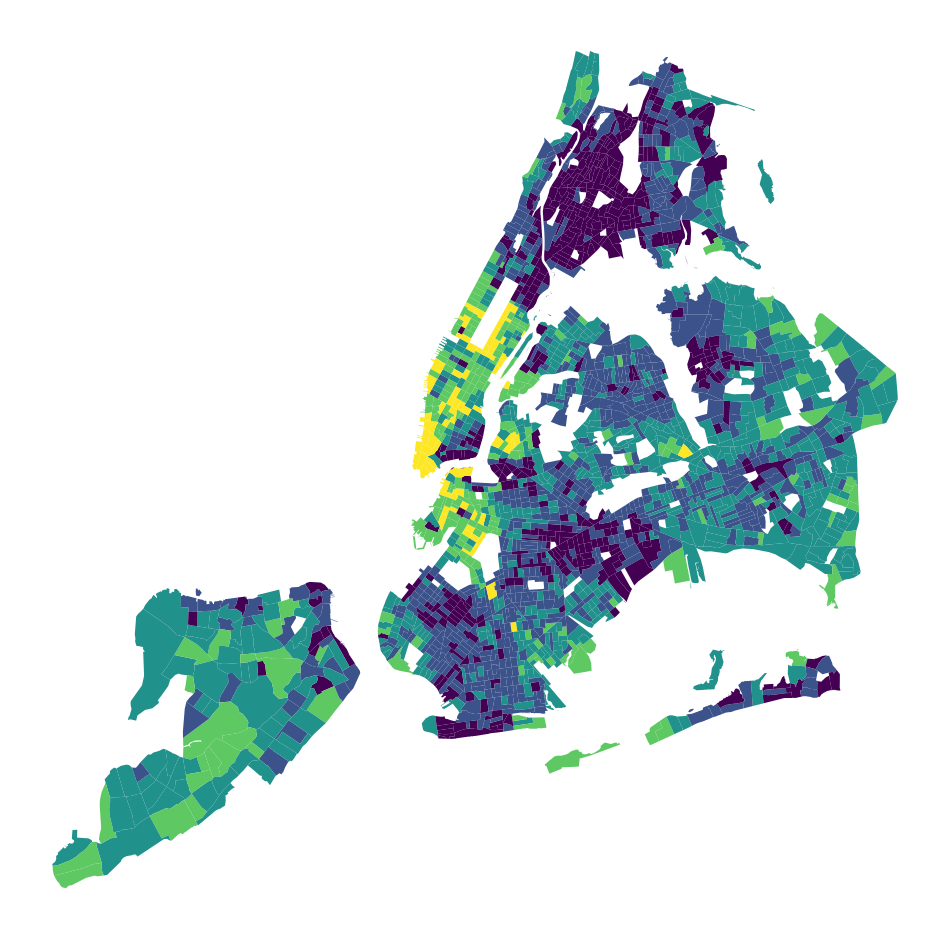

In [46]:
fig, ax = plt.subplots(figsize=(12,12))
gdf.plot(ax=ax, column='estimate', scheme='fisher_jenks')
ax.axis('off');

In [47]:
gdf.head()

,GEOID,NAME,variable,estimate,moe,geometry
0,36005012701,"Census Tract 127.01, Bronx County, New York",B19013_001,38000.0,13393.0,"POLYGON ((-73.89387 40.82651, -73.89293 40.826..."
1,36005037300,"Census Tract 373, Bronx County, New York",B19013_001,28083.0,20379.0,"POLYGON ((-73.89242 40.84800, -73.89154 40.849..."
2,36005011900,"Census Tract 119, Bronx County, New York",B19013_001,30417.0,5132.0,"POLYGON ((-73.89139 40.82494, -73.89059 40.825..."
3,36005039100,"Census Tract 391, Bronx County, New York",B19013_001,30923.0,18890.0,"POLYGON ((-73.88845 40.85602, -73.88757 40.855..."
4,36005007900,"Census Tract 79, Bronx County, New York",B19013_001,31083.0,7336.0,"POLYGON ((-73.90759 40.81660, -73.90630 40.817..."
